In [120]:
rm(list = ls())
library(tidyverse)
options(repr.plot.width = 7, repr.plot.height = 5, repr.plot.res = 300)

Loading data:

In [121]:
df <- as.tibble(read_csv("StudentsPerformance.csv"))

Rows: 1000 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): gender, race/ethnicity, parental level of education, lunch, test pr...
dbl (3): math score, reading score, writing score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [122]:
head(df)

gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
female,group B,bachelor's degree,standard,none,72,72,74
female,group C,some college,standard,completed,69,90,88
female,group B,master's degree,standard,none,90,95,93
male,group A,associate's degree,free/reduced,none,47,57,44
male,group C,some college,standard,none,76,78,75
female,group B,associate's degree,standard,none,71,83,78


In [123]:
summary(df)

    gender          race/ethnicity     parental level of education
 Length:1000        Length:1000        Length:1000                
 Class :character   Class :character   Class :character           
 Mode  :character   Mode  :character   Mode  :character           
                                                                  
                                                                  
                                                                  
    lunch           test preparation course   math score     reading score   
 Length:1000        Length:1000             Min.   :  0.00   Min.   : 17.00  
 Class :character   Class :character        1st Qu.: 57.00   1st Qu.: 59.00  
 Mode  :character   Mode  :character        Median : 66.00   Median : 70.00  
                                            Mean   : 66.09   Mean   : 69.17  
                                            3rd Qu.: 77.00   3rd Qu.: 79.00  
                                            Max.   :100.00   Ma

In [124]:
glimpse(df)

Rows: 1,000
Columns: 8
$ gender                        <chr> "female", "female", "female", "male", "m…
$ `race/ethnicity`              <chr> "group B", "group C", "group B", "group …
$ `parental level of education` <chr> "bachelor's degree", "some college", "ma…
$ lunch                         <chr> "standard", "standard", "standard", "fre…
$ `test preparation course`     <chr> "none", "completed", "none", "none", "no…
$ `math score`                  <dbl> 72, 69, 90, 47, 76, 71, 88, 40, 64, 38, …
$ `reading score`               <dbl> 72, 90, 95, 57, 78, 83, 95, 43, 64, 60, …
$ `writing score`               <dbl> 74, 88, 93, 44, 75, 78, 92, 39, 67, 50, …


Renaming variables:

In [125]:
new_names <- c(ethnicity = 'race/ethnicity', education_level = 'parental level of education', preparation_course = 'test preparation course', math_score = 'math score', reading_score = 'reading score', writing_score = 'writing score')
df <- df %>%
    rename(all_of(new_names))

Changing character to factor variables:

In [126]:
glimpse(df)

Rows: 1,000
Columns: 8
$ gender             <chr> "female", "female", "female", "male", "male", "fema…
$ ethnicity          <chr> "group B", "group C", "group B", "group A", "group …
$ education_level    <chr> "bachelor's degree", "some college", "master's degr…
$ lunch              <chr> "standard", "standard", "standard", "free/reduced",…
$ preparation_course <chr> "none", "completed", "none", "none", "none", "none"…
$ math_score         <dbl> 72, 69, 90, 47, 76, 71, 88, 40, 64, 38, 58, 40, 65,…
$ reading_score      <dbl> 72, 90, 95, 57, 78, 83, 95, 43, 64, 60, 54, 52, 81,…
$ writing_score      <dbl> 74, 88, 93, 44, 75, 78, 92, 39, 67, 50, 52, 43, 73,…


In [127]:
df <- df %>% 
    mutate(across(c(gender, ethnicity, education_level, lunch, preparation_course), as.factor))

In [128]:
levels(df$education_level) <- c("associates_degree", "bachelors_degree", "high_school", "masters_degree", "some_college", "some_high_school")

In [129]:
levels(df$ethnicity) <- c("group_A", "group_B", "group_C", "group_D", "group_E")

In [130]:
head(df)

gender,ethnicity,education_level,lunch,preparation_course,math_score,reading_score,writing_score
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
female,group_B,bachelors_degree,standard,none,72,72,74
female,group_C,some_college,standard,completed,69,90,88
female,group_B,masters_degree,standard,none,90,95,93
male,group_A,associates_degree,free/reduced,none,47,57,44
male,group_C,some_college,standard,none,76,78,75
female,group_B,associates_degree,standard,none,71,83,78


In [131]:
glimpse(df)

Rows: 1,000
Columns: 8
$ gender             <fct> female, female, female, male, male, female, female,…
$ ethnicity          <fct> group_B, group_C, group_B, group_A, group_C, group_…
$ education_level    <fct> bachelors_degree, some_college, masters_degree, ass…
$ lunch              <fct> standard, standard, standard, free/reduced, standar…
$ preparation_course <fct> none, completed, none, none, none, none, completed,…
$ math_score         <dbl> 72, 69, 90, 47, 76, 71, 88, 40, 64, 38, 58, 40, 65,…
$ reading_score      <dbl> 72, 90, 95, 57, 78, 83, 95, 43, 64, 60, 54, 52, 81,…
$ writing_score      <dbl> 74, 88, 93, 44, 75, 78, 92, 39, 67, 50, 52, 43, 73,…


Data visualisation:

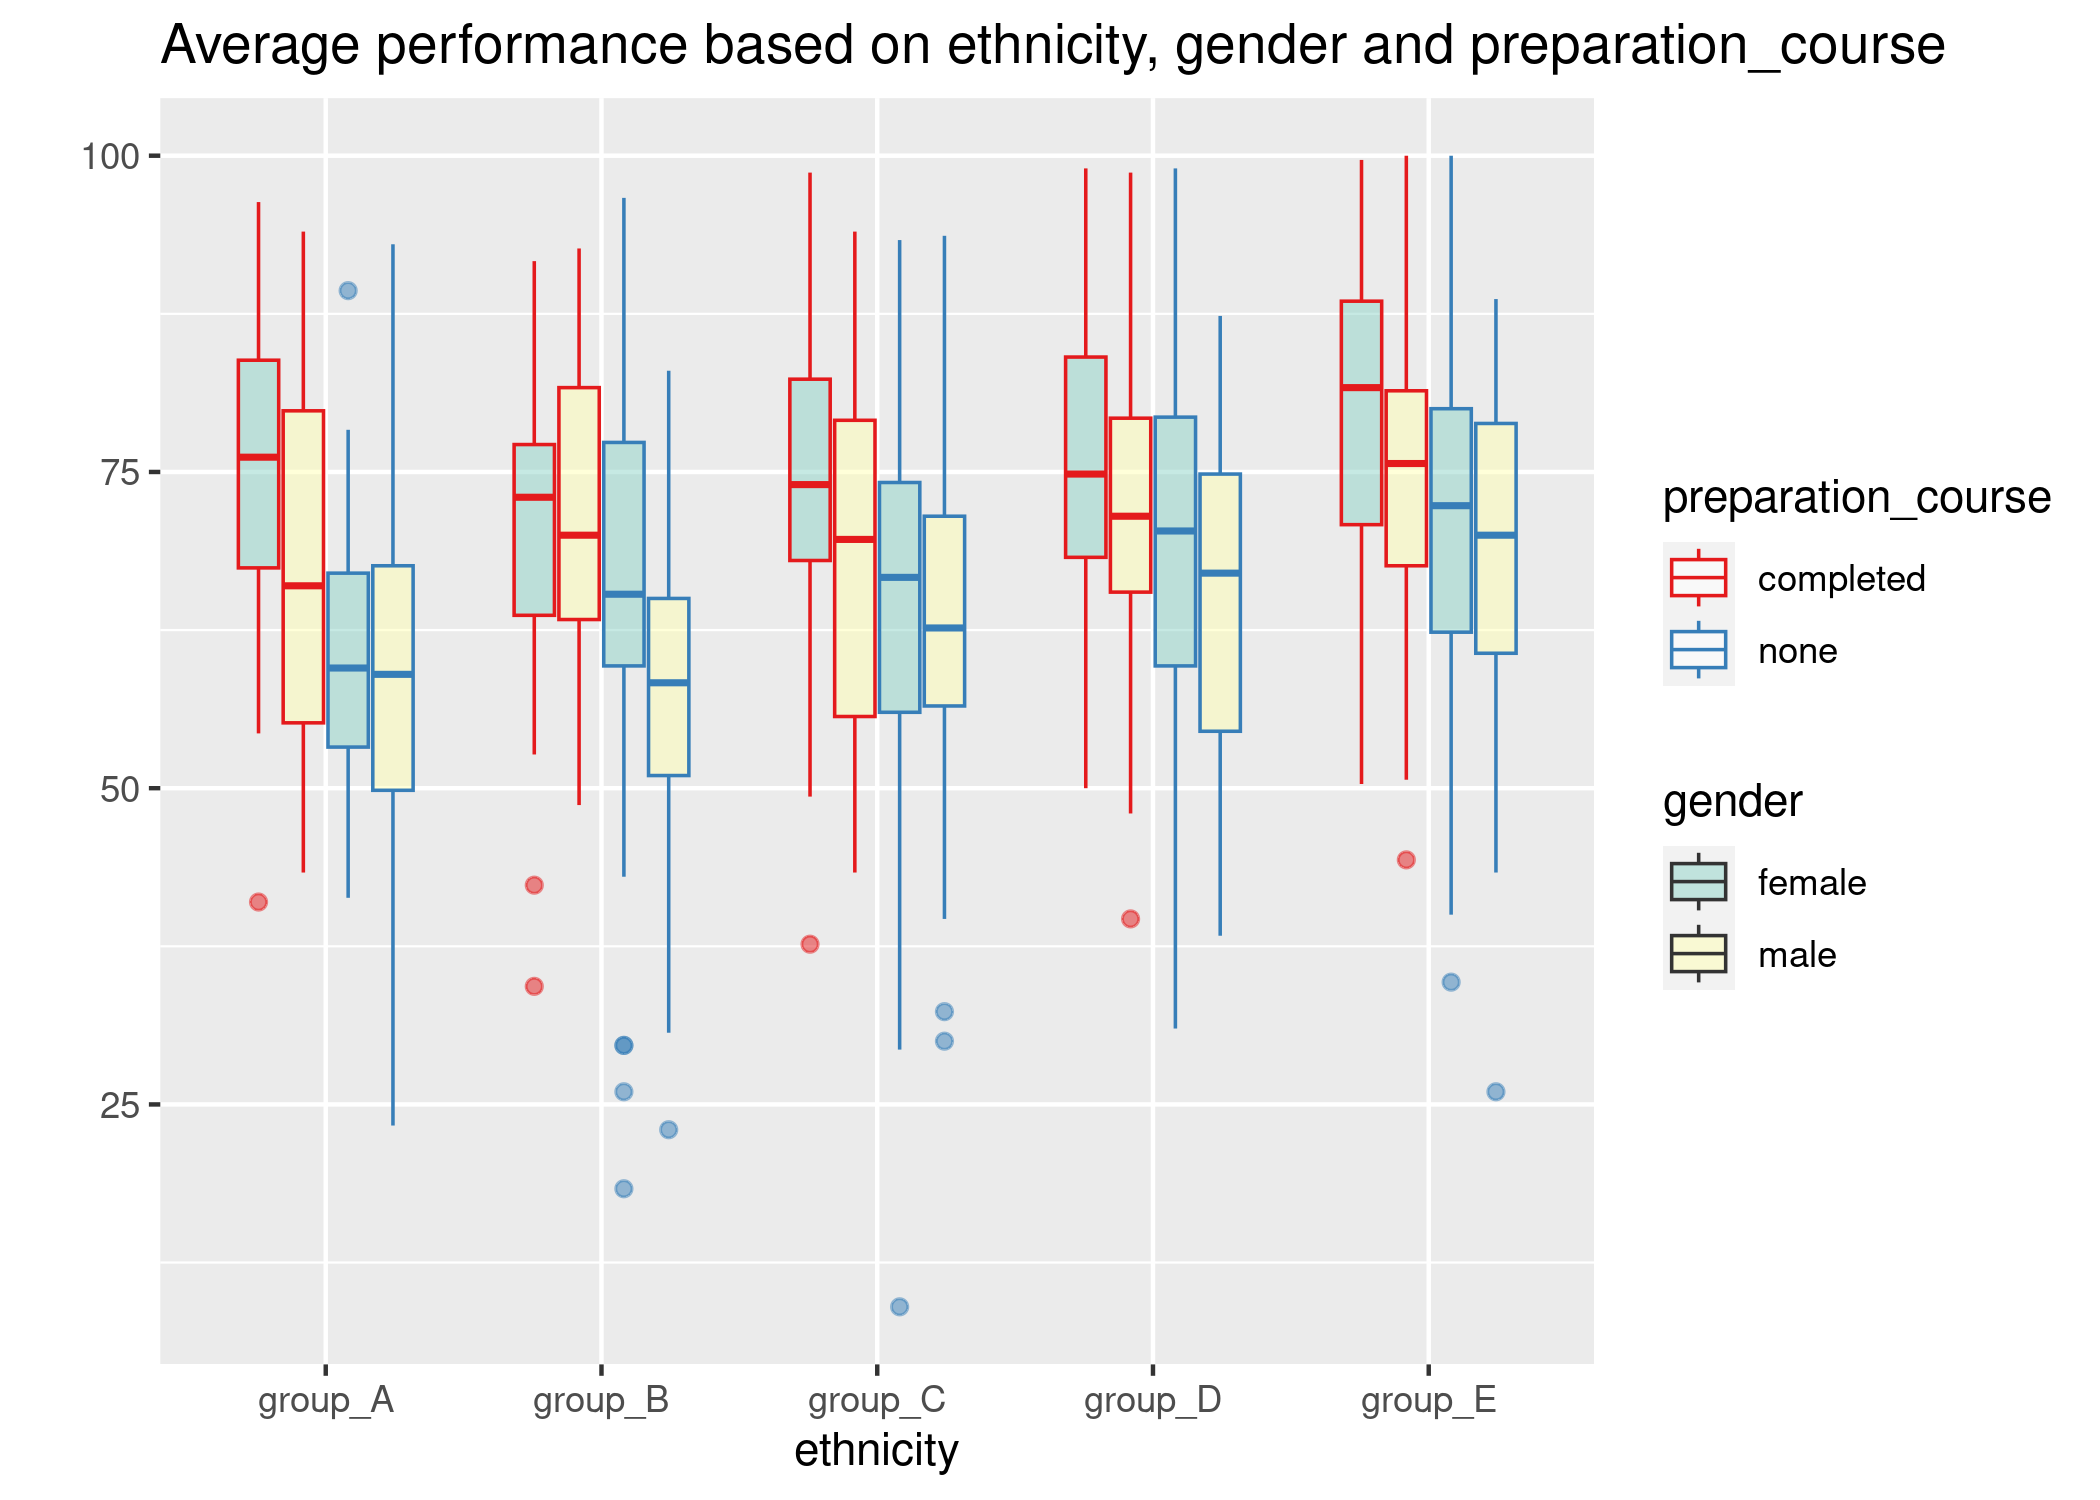

In [132]:
df %>% 
    ggplot(aes(x=ethnicity, y=(math_score + reading_score + writing_score)/3)) + 
    geom_boxplot(aes(color=preparation_course, fill=gender), width=0.65, alpha=0.5, linewidth=0.4) + 
    scale_color_brewer(palette = "Set1") + 
    scale_fill_brewer(palette = "Set3") + 
    labs(title = "Average performance based on ethnicity, gender and preparation_course", y="")

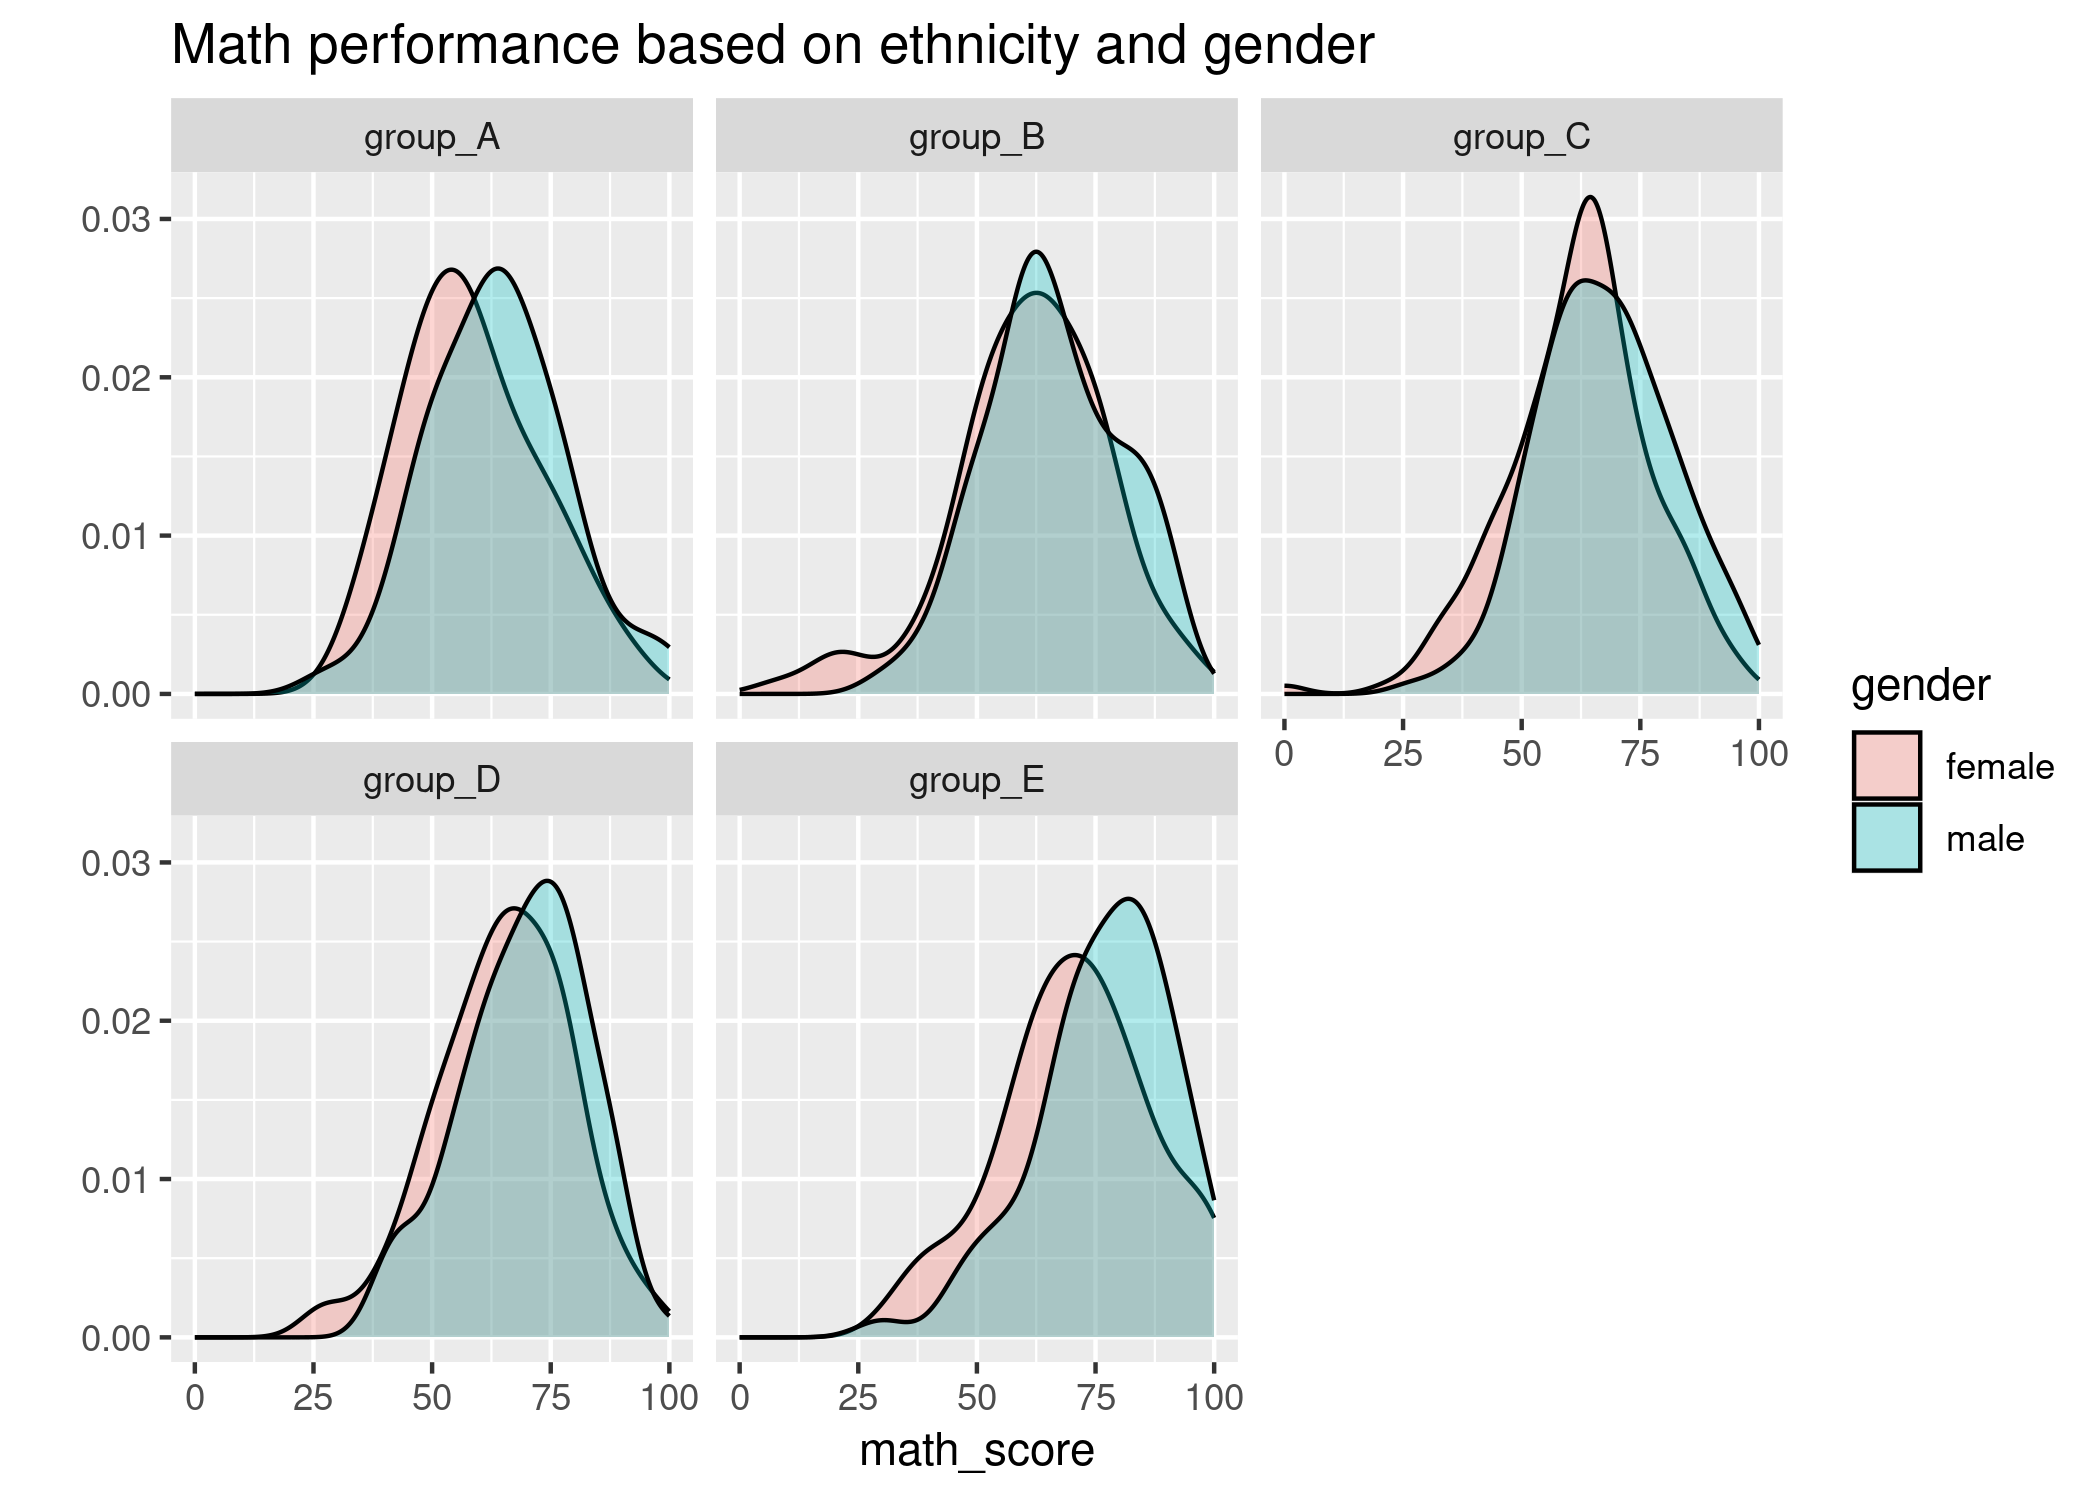

In [133]:
df %>% 
    ggplot(aes(fill = gender)) + 
    geom_density(aes(x=math_score), alpha=0.3) + 
    labs(title = "Math performance based on ethnicity and gender", y = "") + 
    facet_wrap(vars(ethnicity))

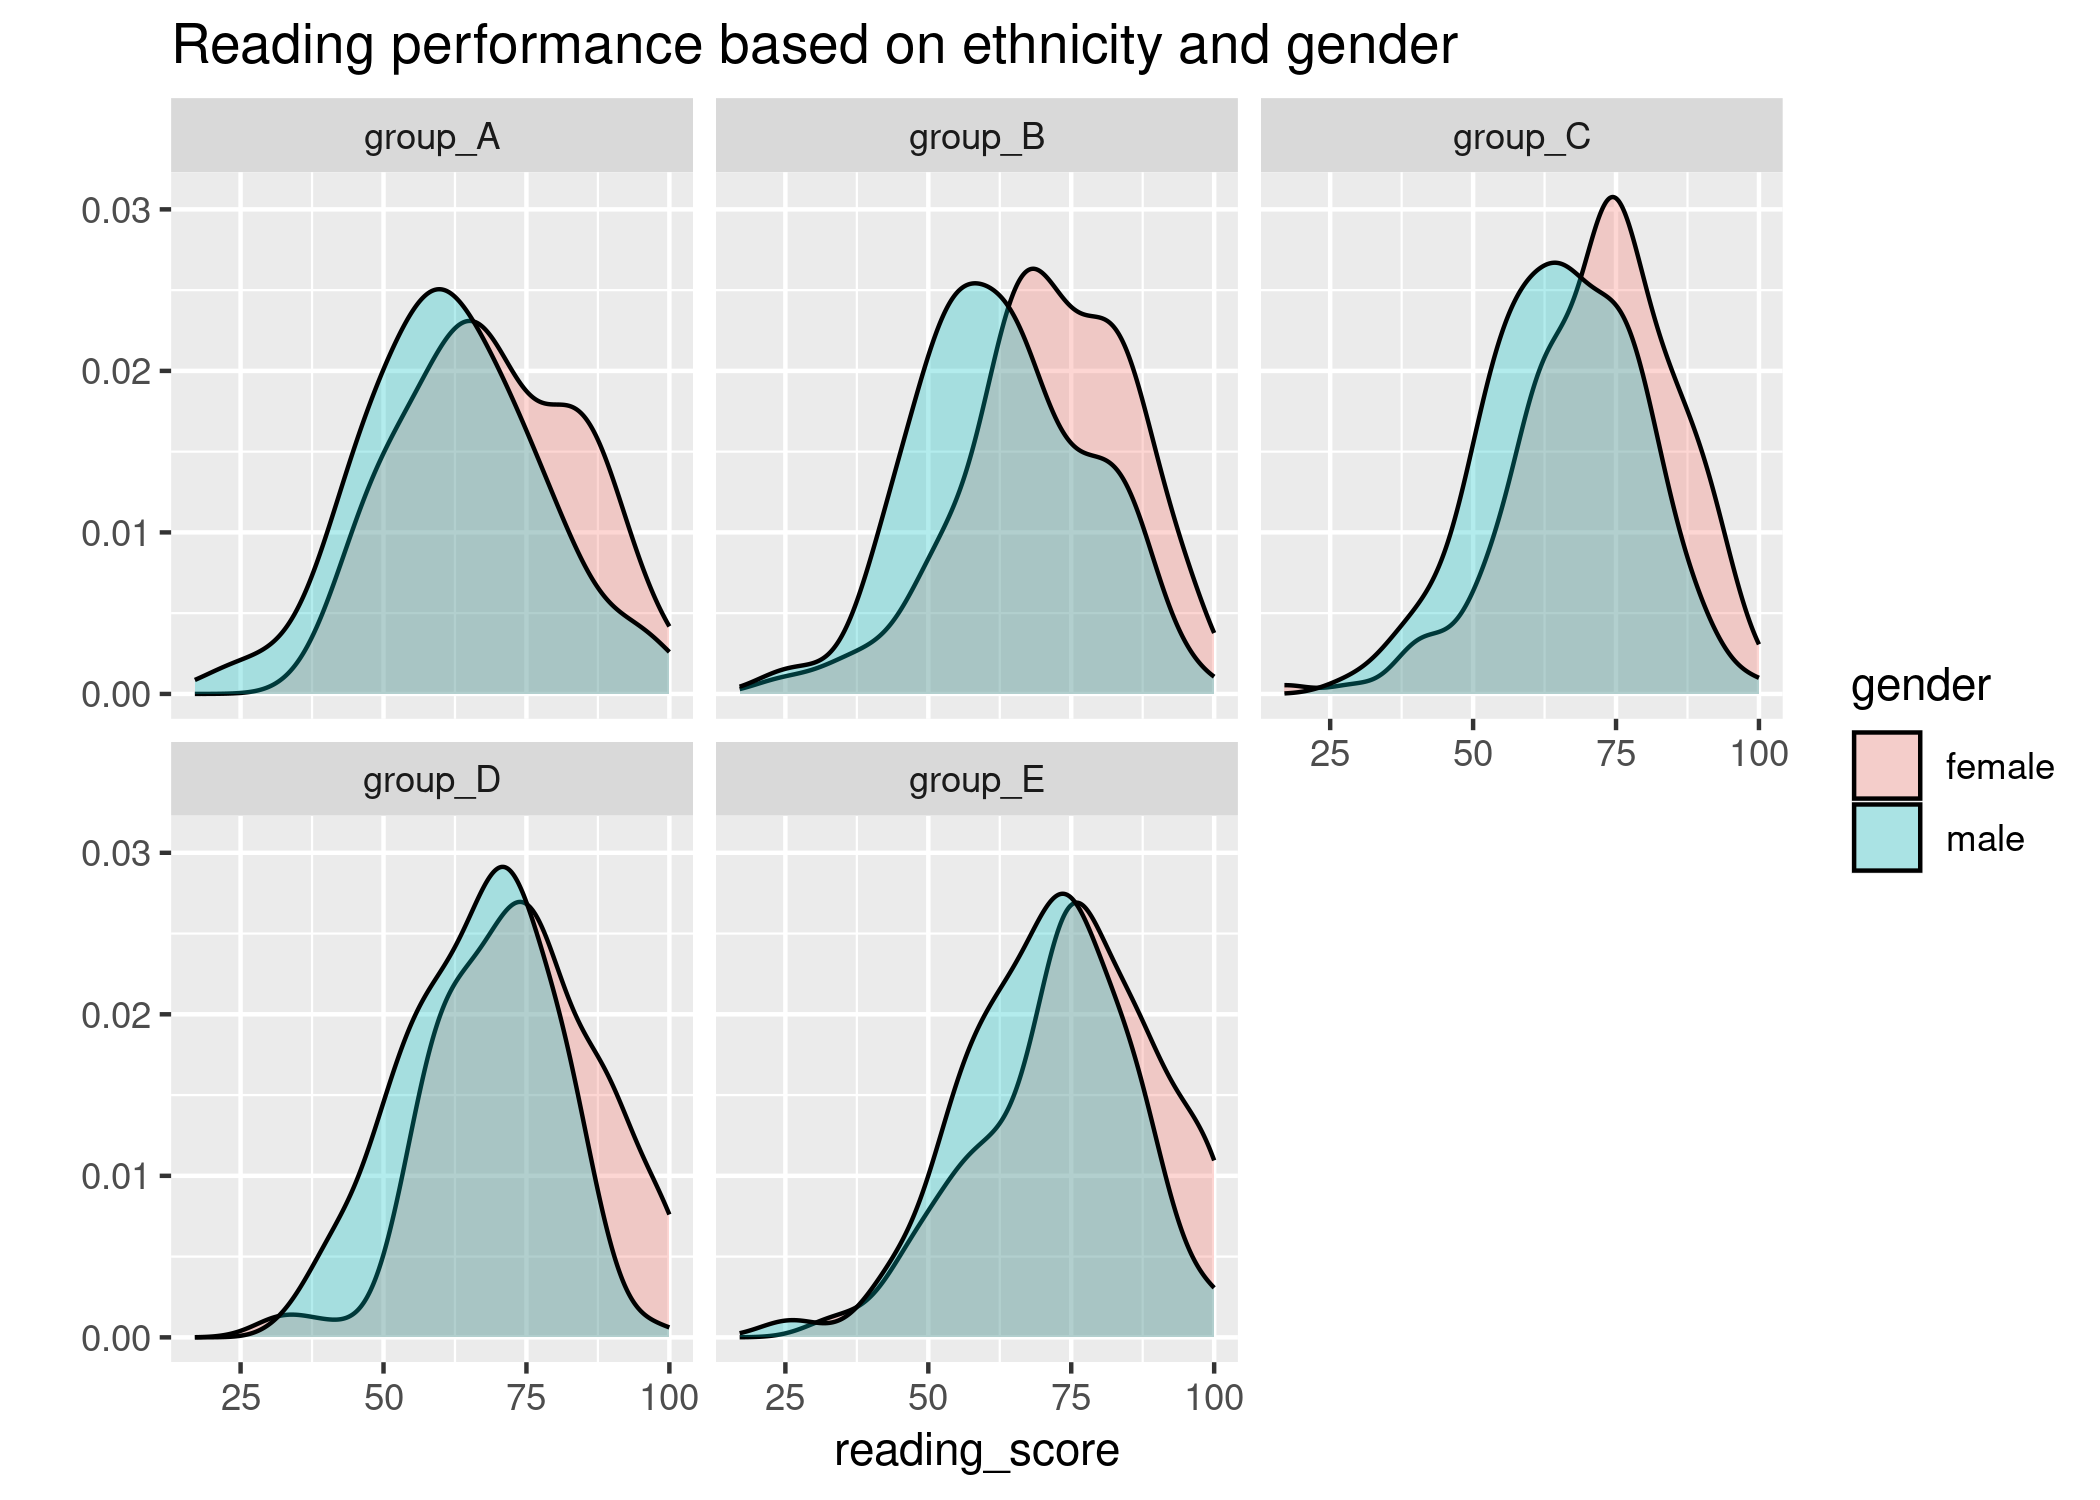

In [134]:
df %>% 
    ggplot(aes(fill = gender)) + 
    geom_density(aes(x=reading_score), alpha=0.3) + 
    labs(title = "Reading performance based on ethnicity and gender", y = "") + 
    facet_wrap(vars(ethnicity))

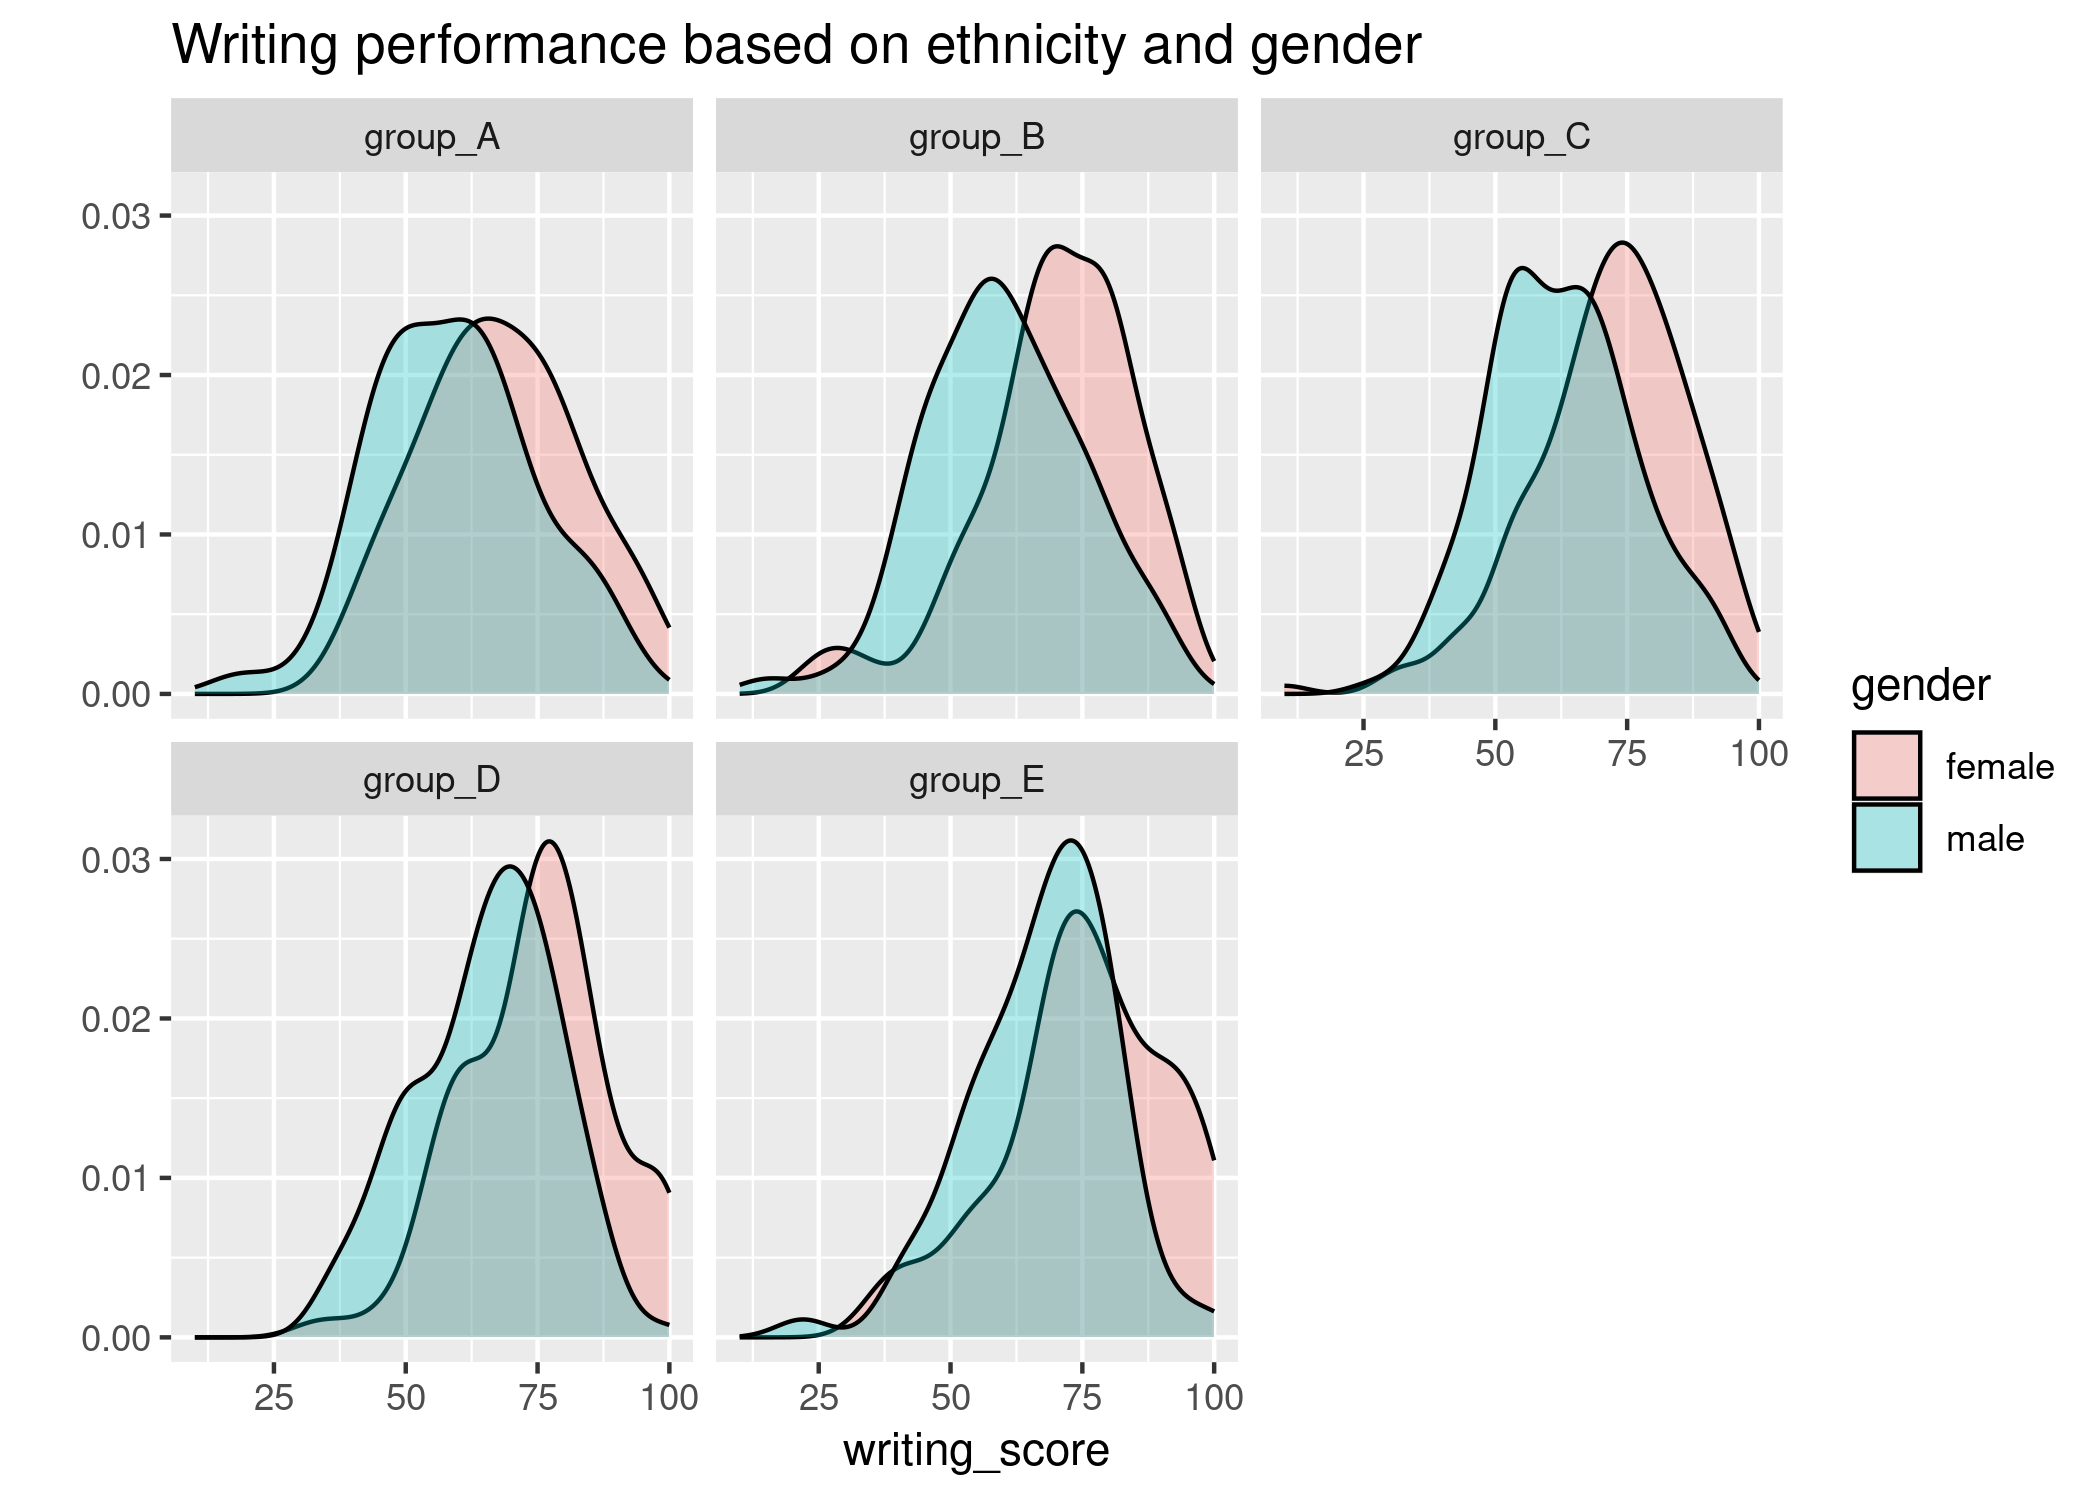

In [135]:
df %>% 
    ggplot(aes(fill = gender)) +
    geom_density(aes(x=writing_score), alpha=0.3) + 
    labs(title = "Writing performance based on ethnicity and gender", y = "") + 
    facet_wrap(vars(ethnicity))

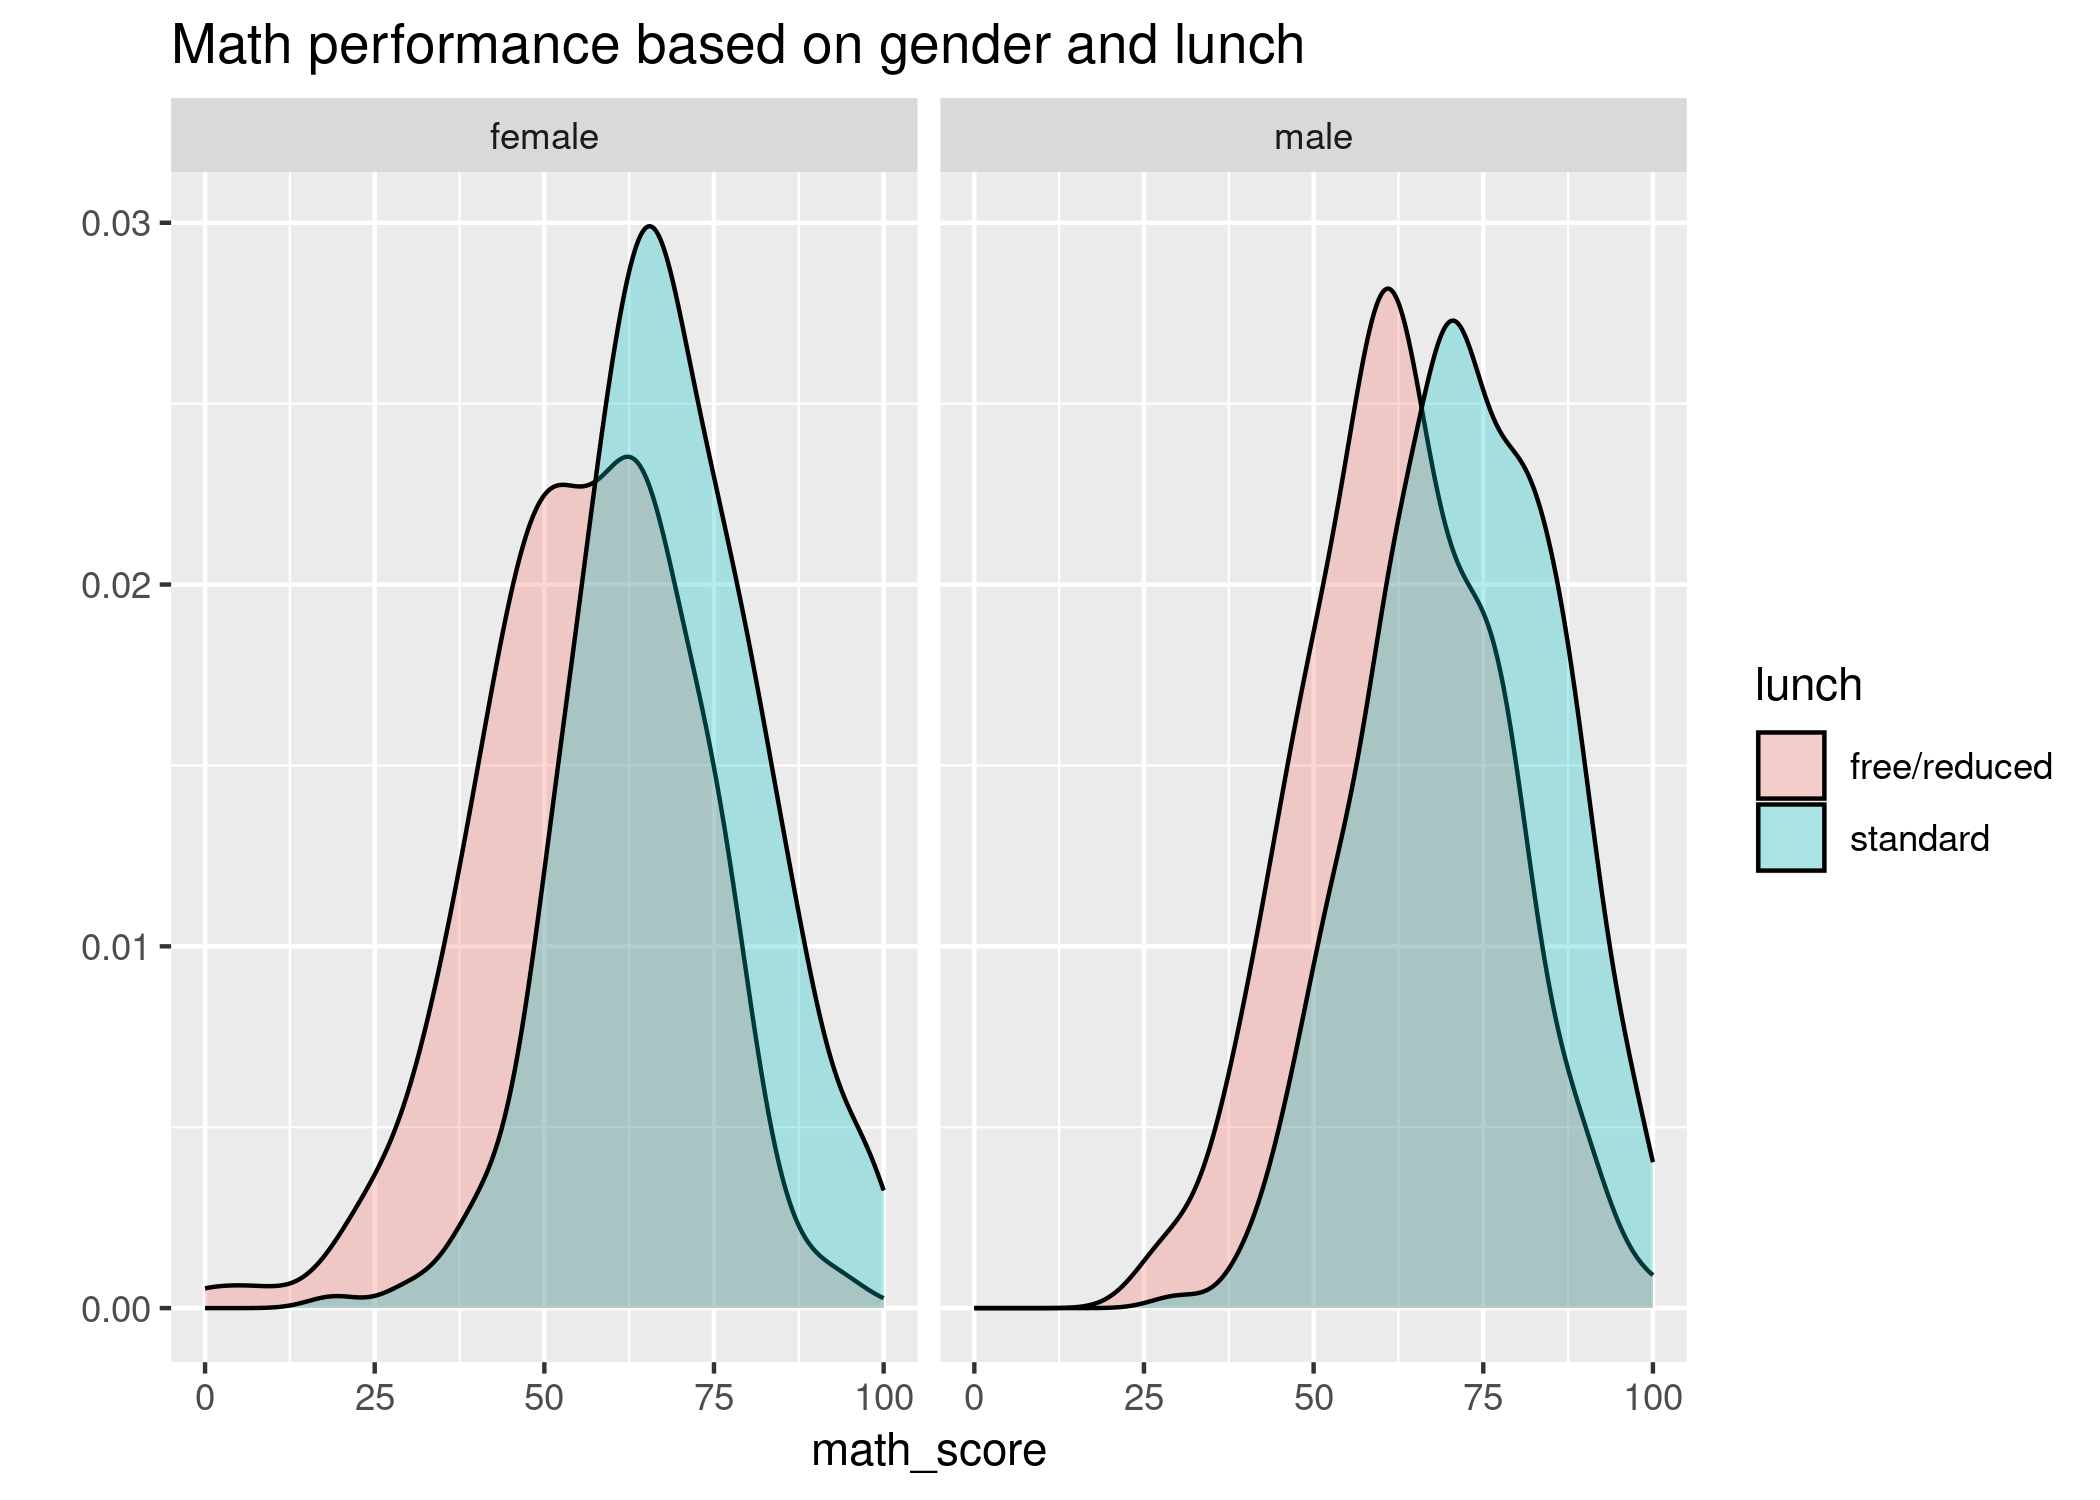

In [136]:
df %>% 
    ggplot(aes(fill = lunch)) + 
    geom_density(aes(x=math_score), alpha=0.3) + 
    labs(title = "Math performance based on gender and lunch", y = "") + 
    facet_wrap(vars(gender))

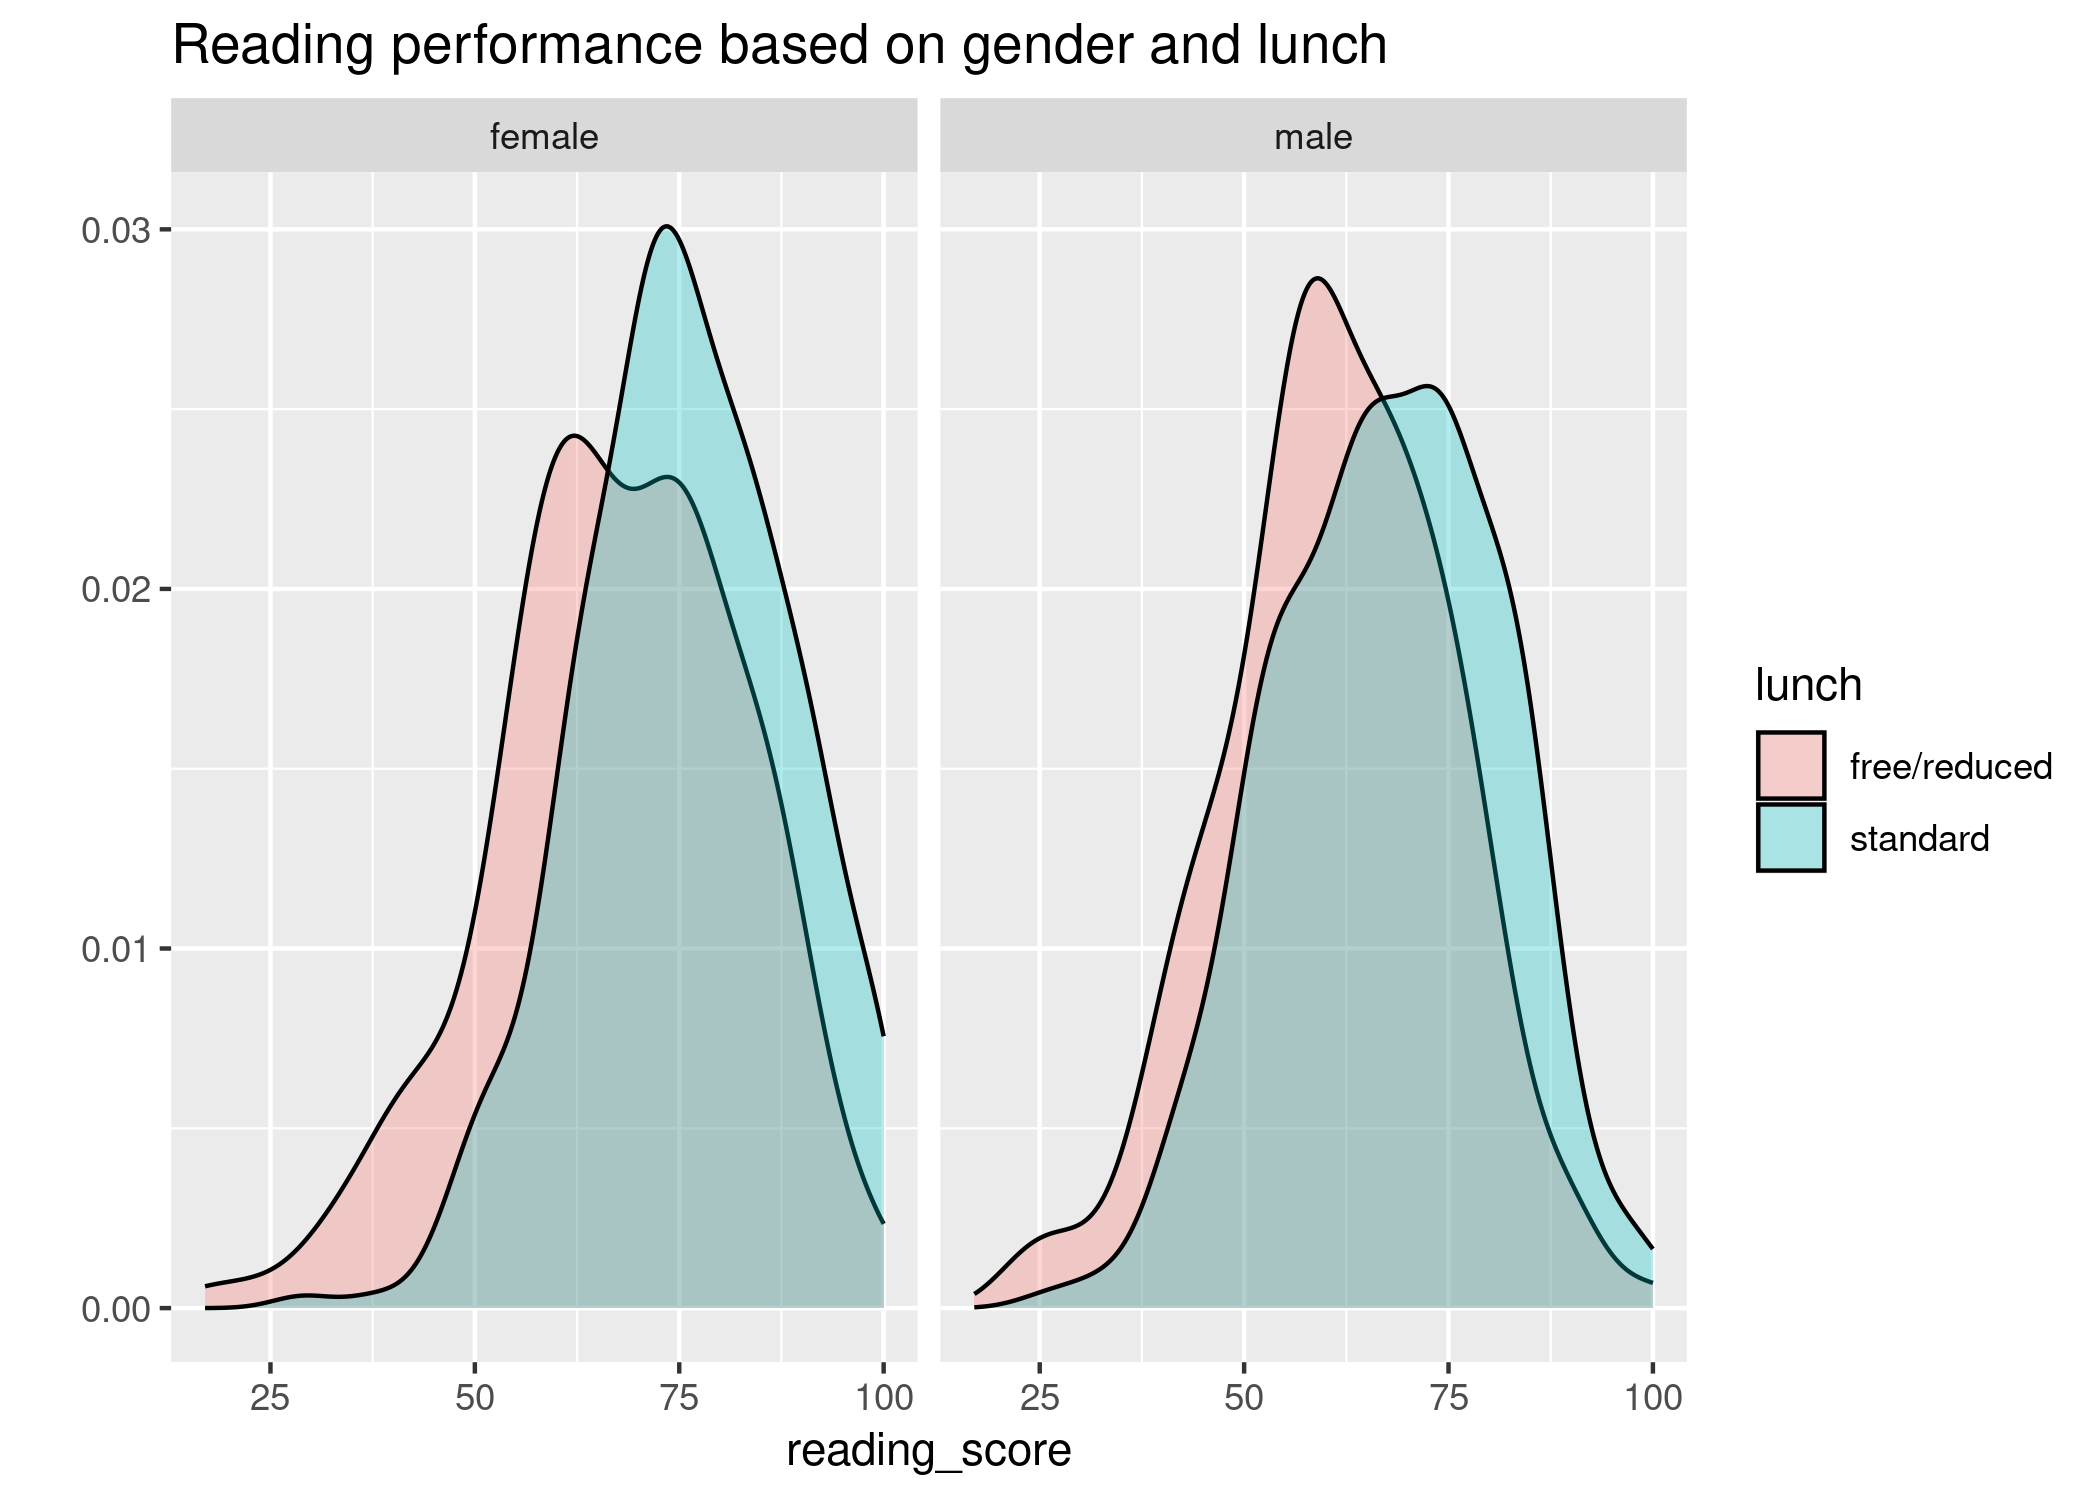

In [137]:
df %>% 
    ggplot(aes(fill = lunch)) + 
    geom_density(aes(x=reading_score), alpha=0.3) + 
    labs(title = "Reading performance based on gender and lunch", y = "") + 
    facet_wrap(vars(gender))

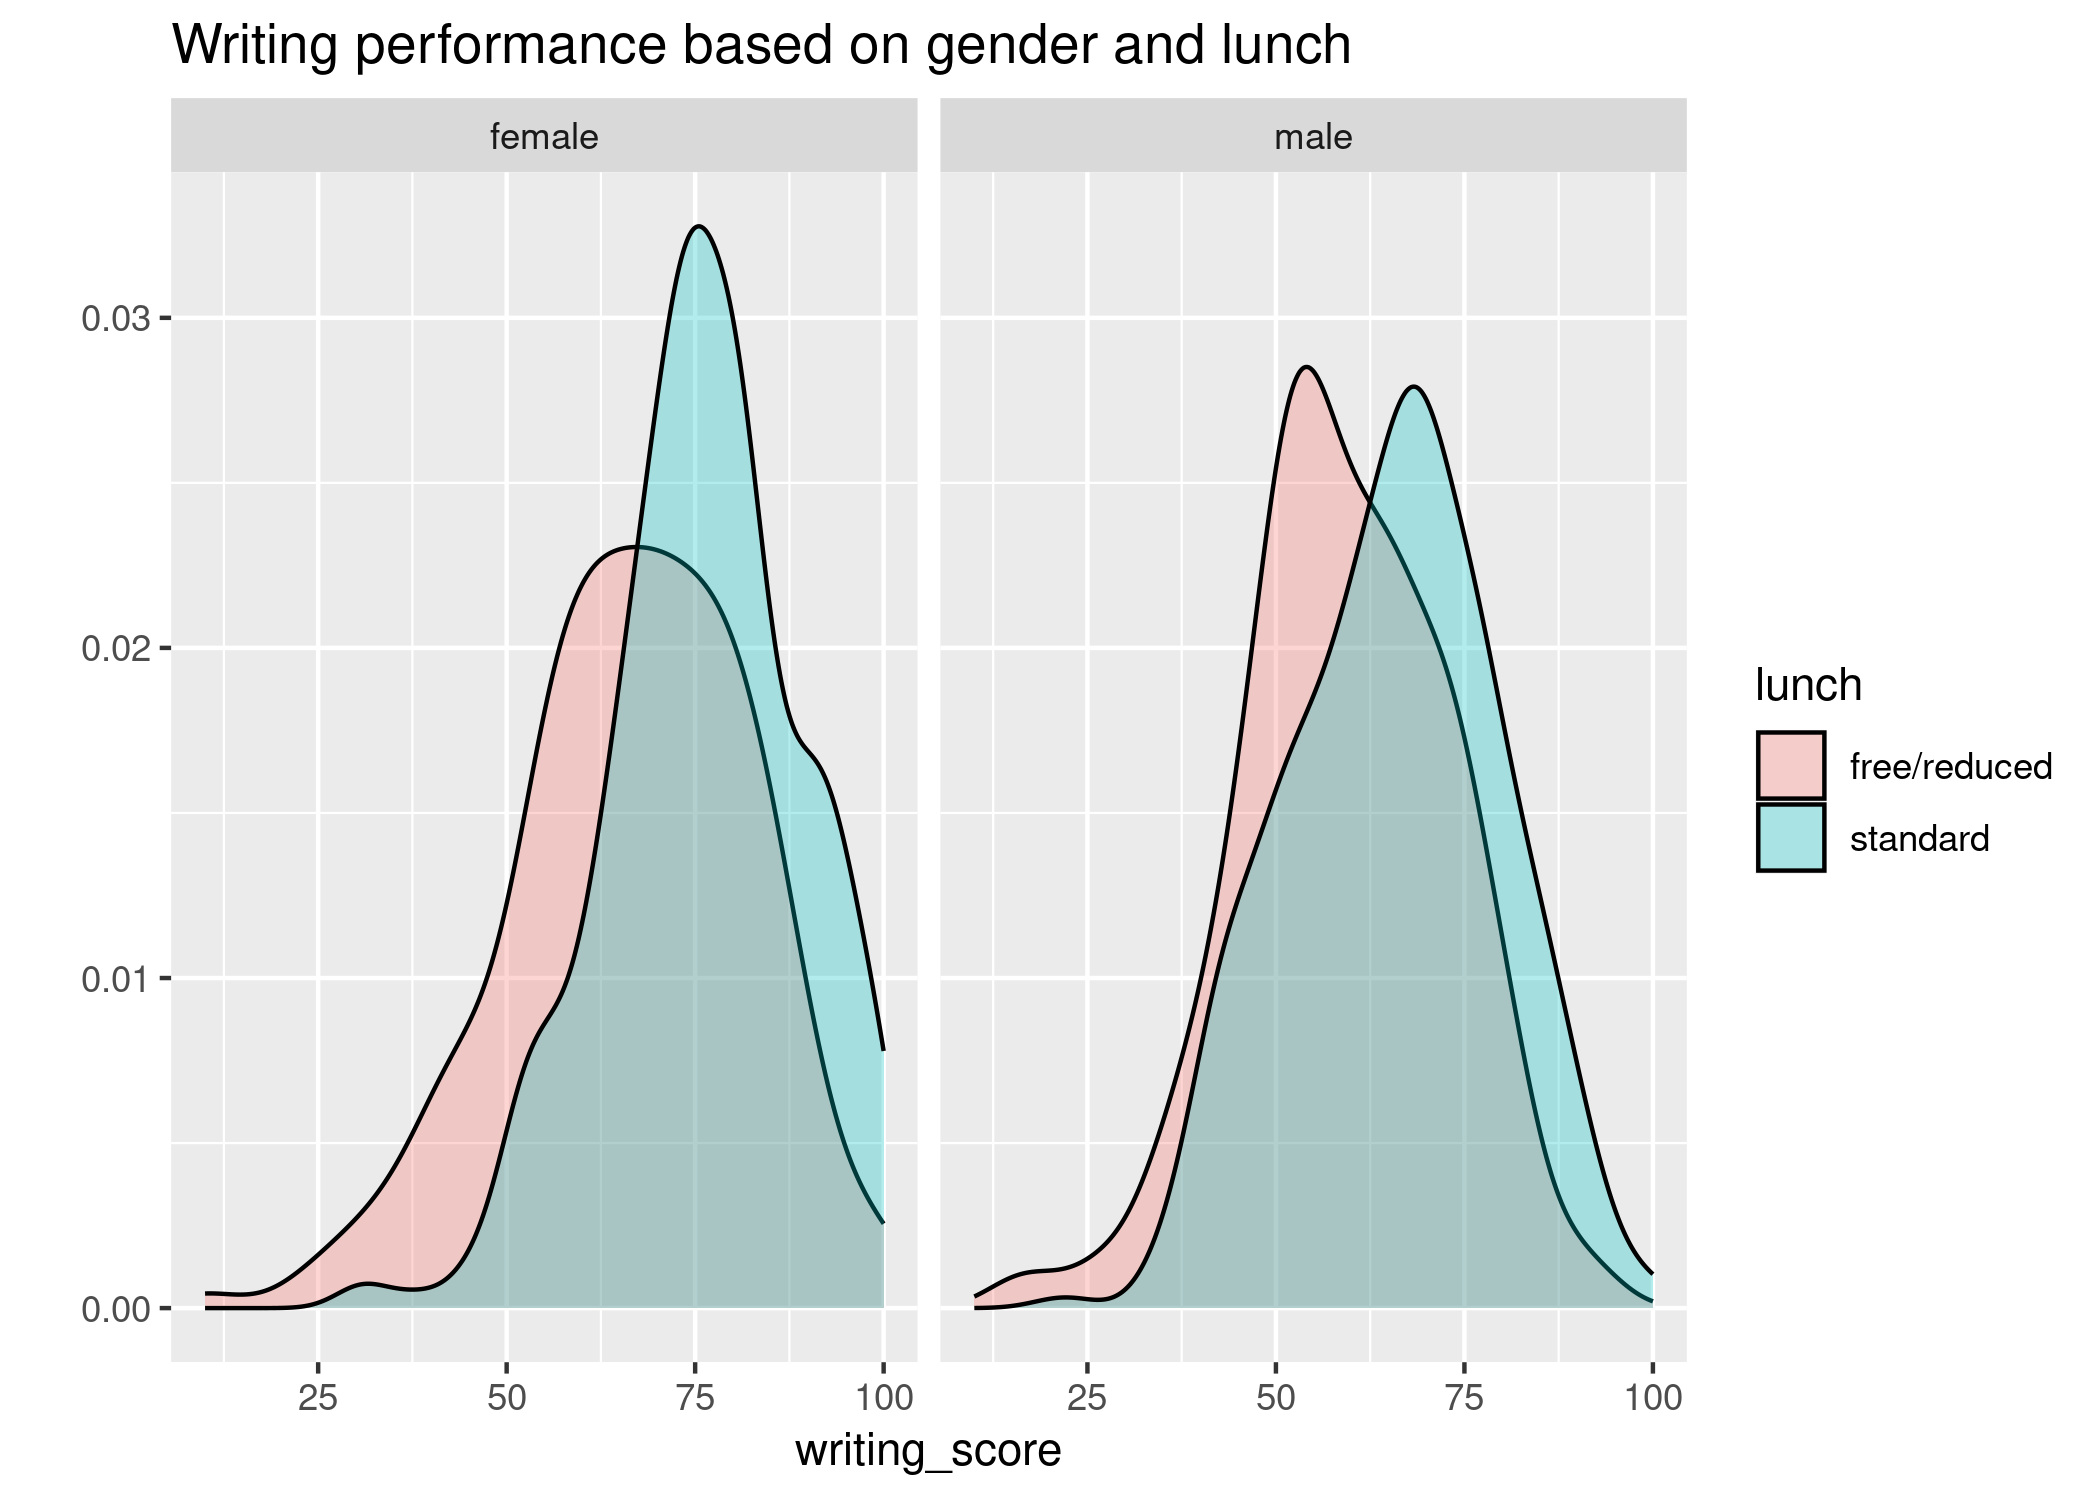

In [138]:
df %>% 
    ggplot(aes(fill = lunch)) + 
    geom_density(aes(x=writing_score), alpha=0.3) + 
    labs(title = "Writing performance based on gender and lunch", y = "") + 
    facet_wrap(vars(gender))

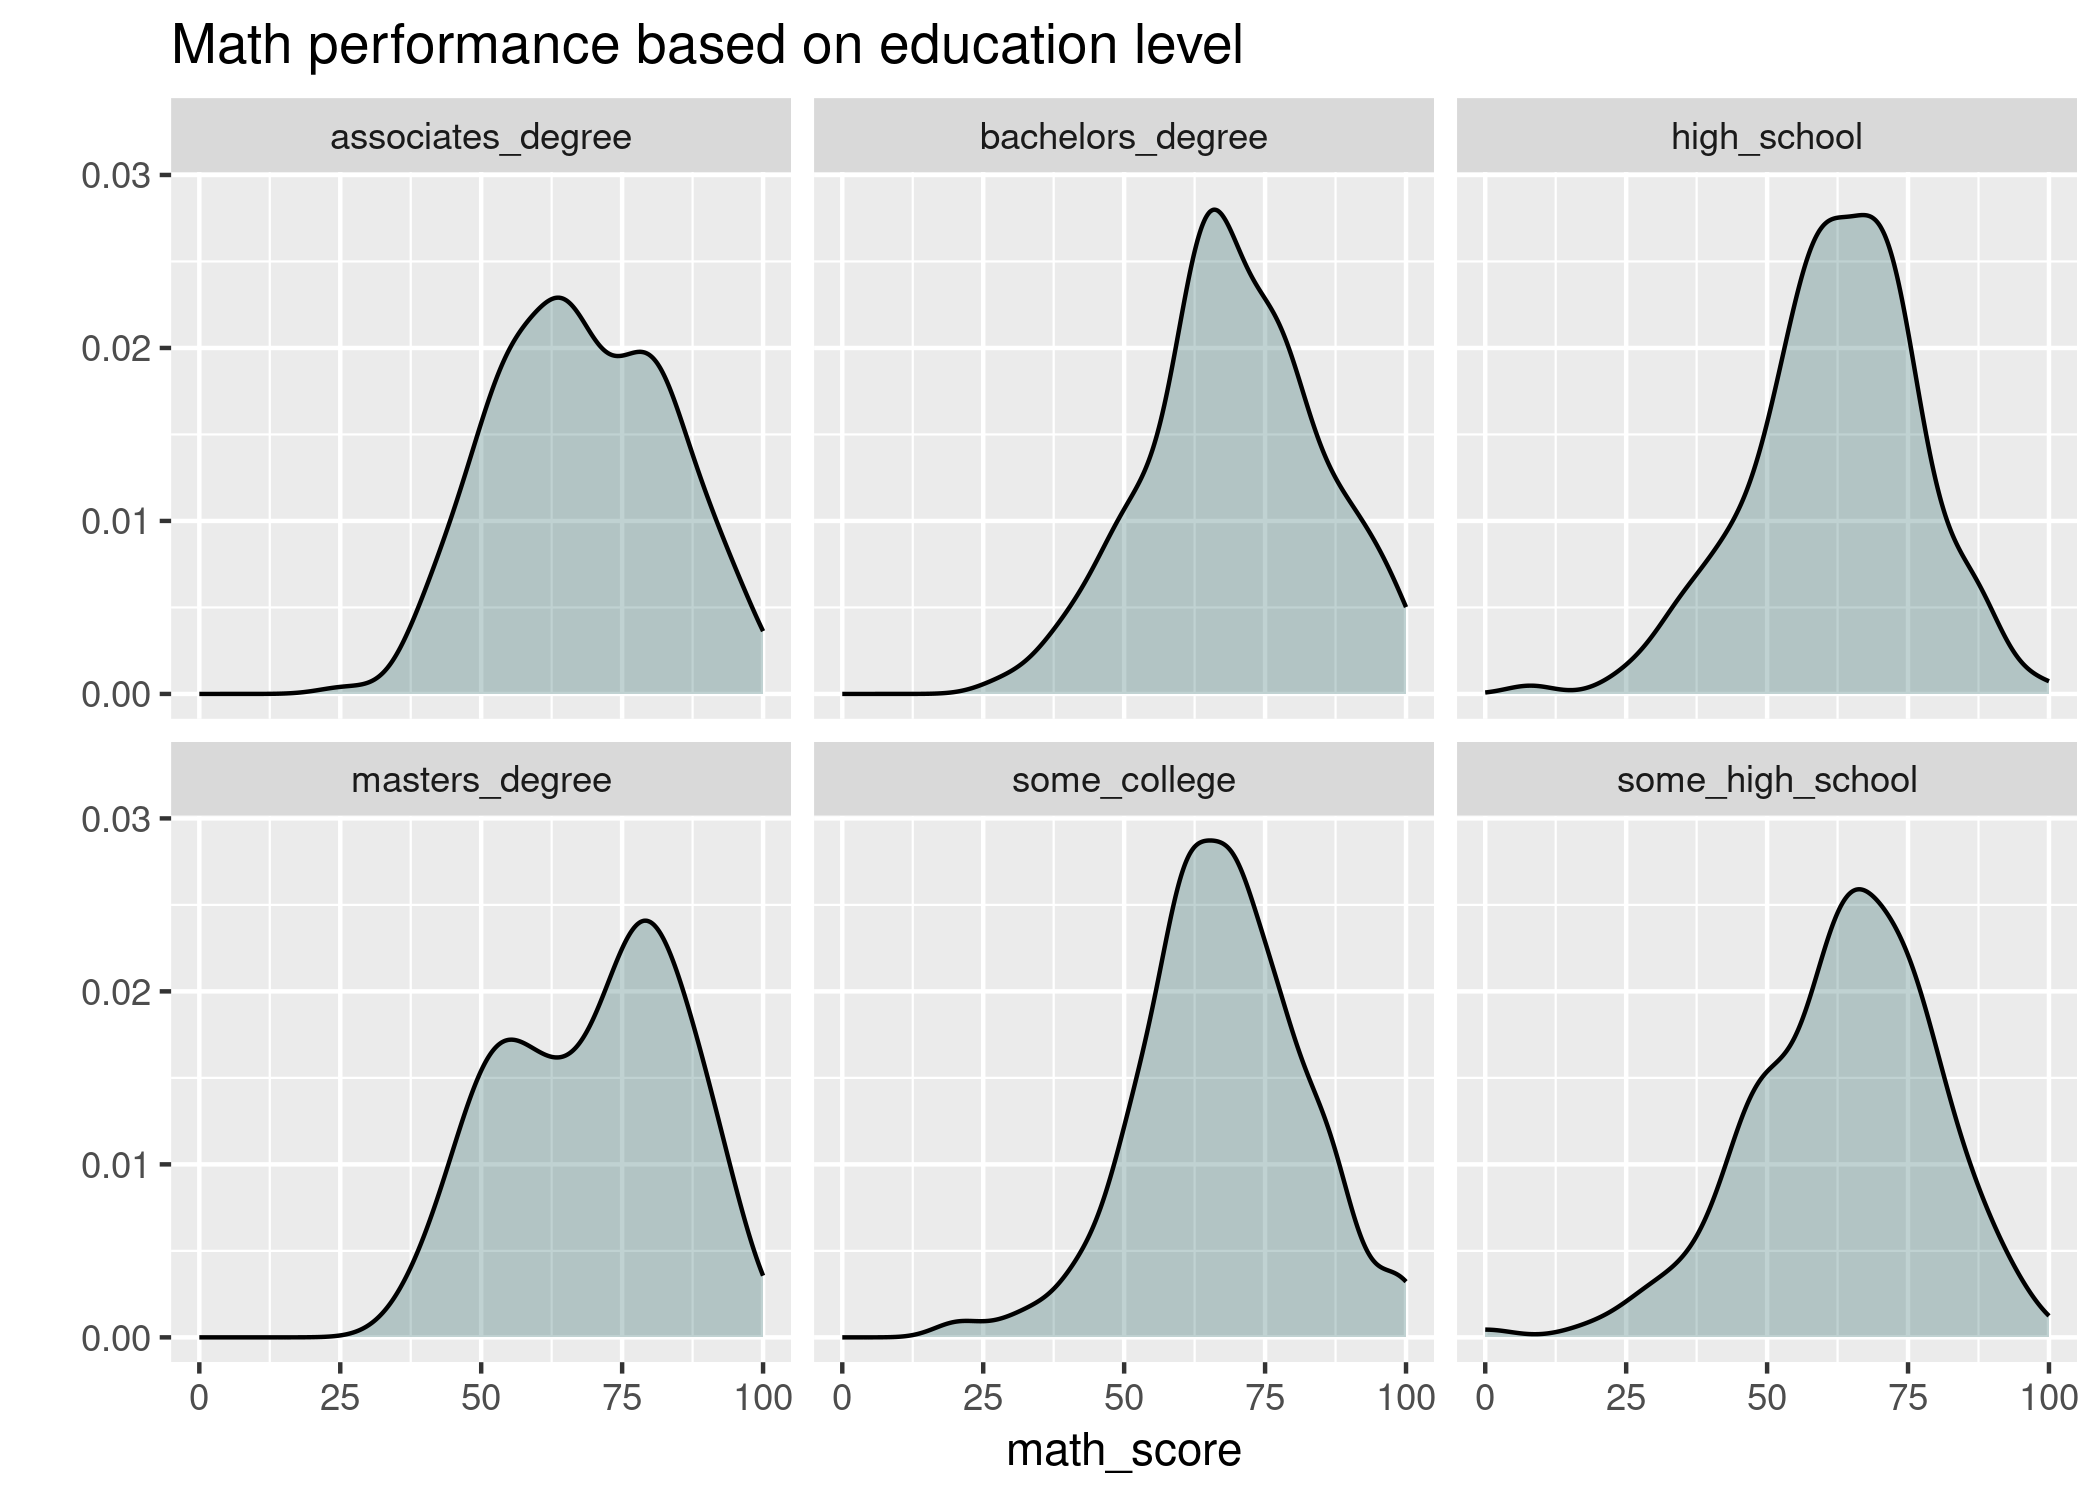

In [139]:
df %>% 
    ggplot() +
    geom_density(aes(x=math_score), alpha=0.3, color="black", fill="#2e6969") + 
    labs(title = "Math performance based on education level", y = "") + 
    facet_wrap(vars(education_level))

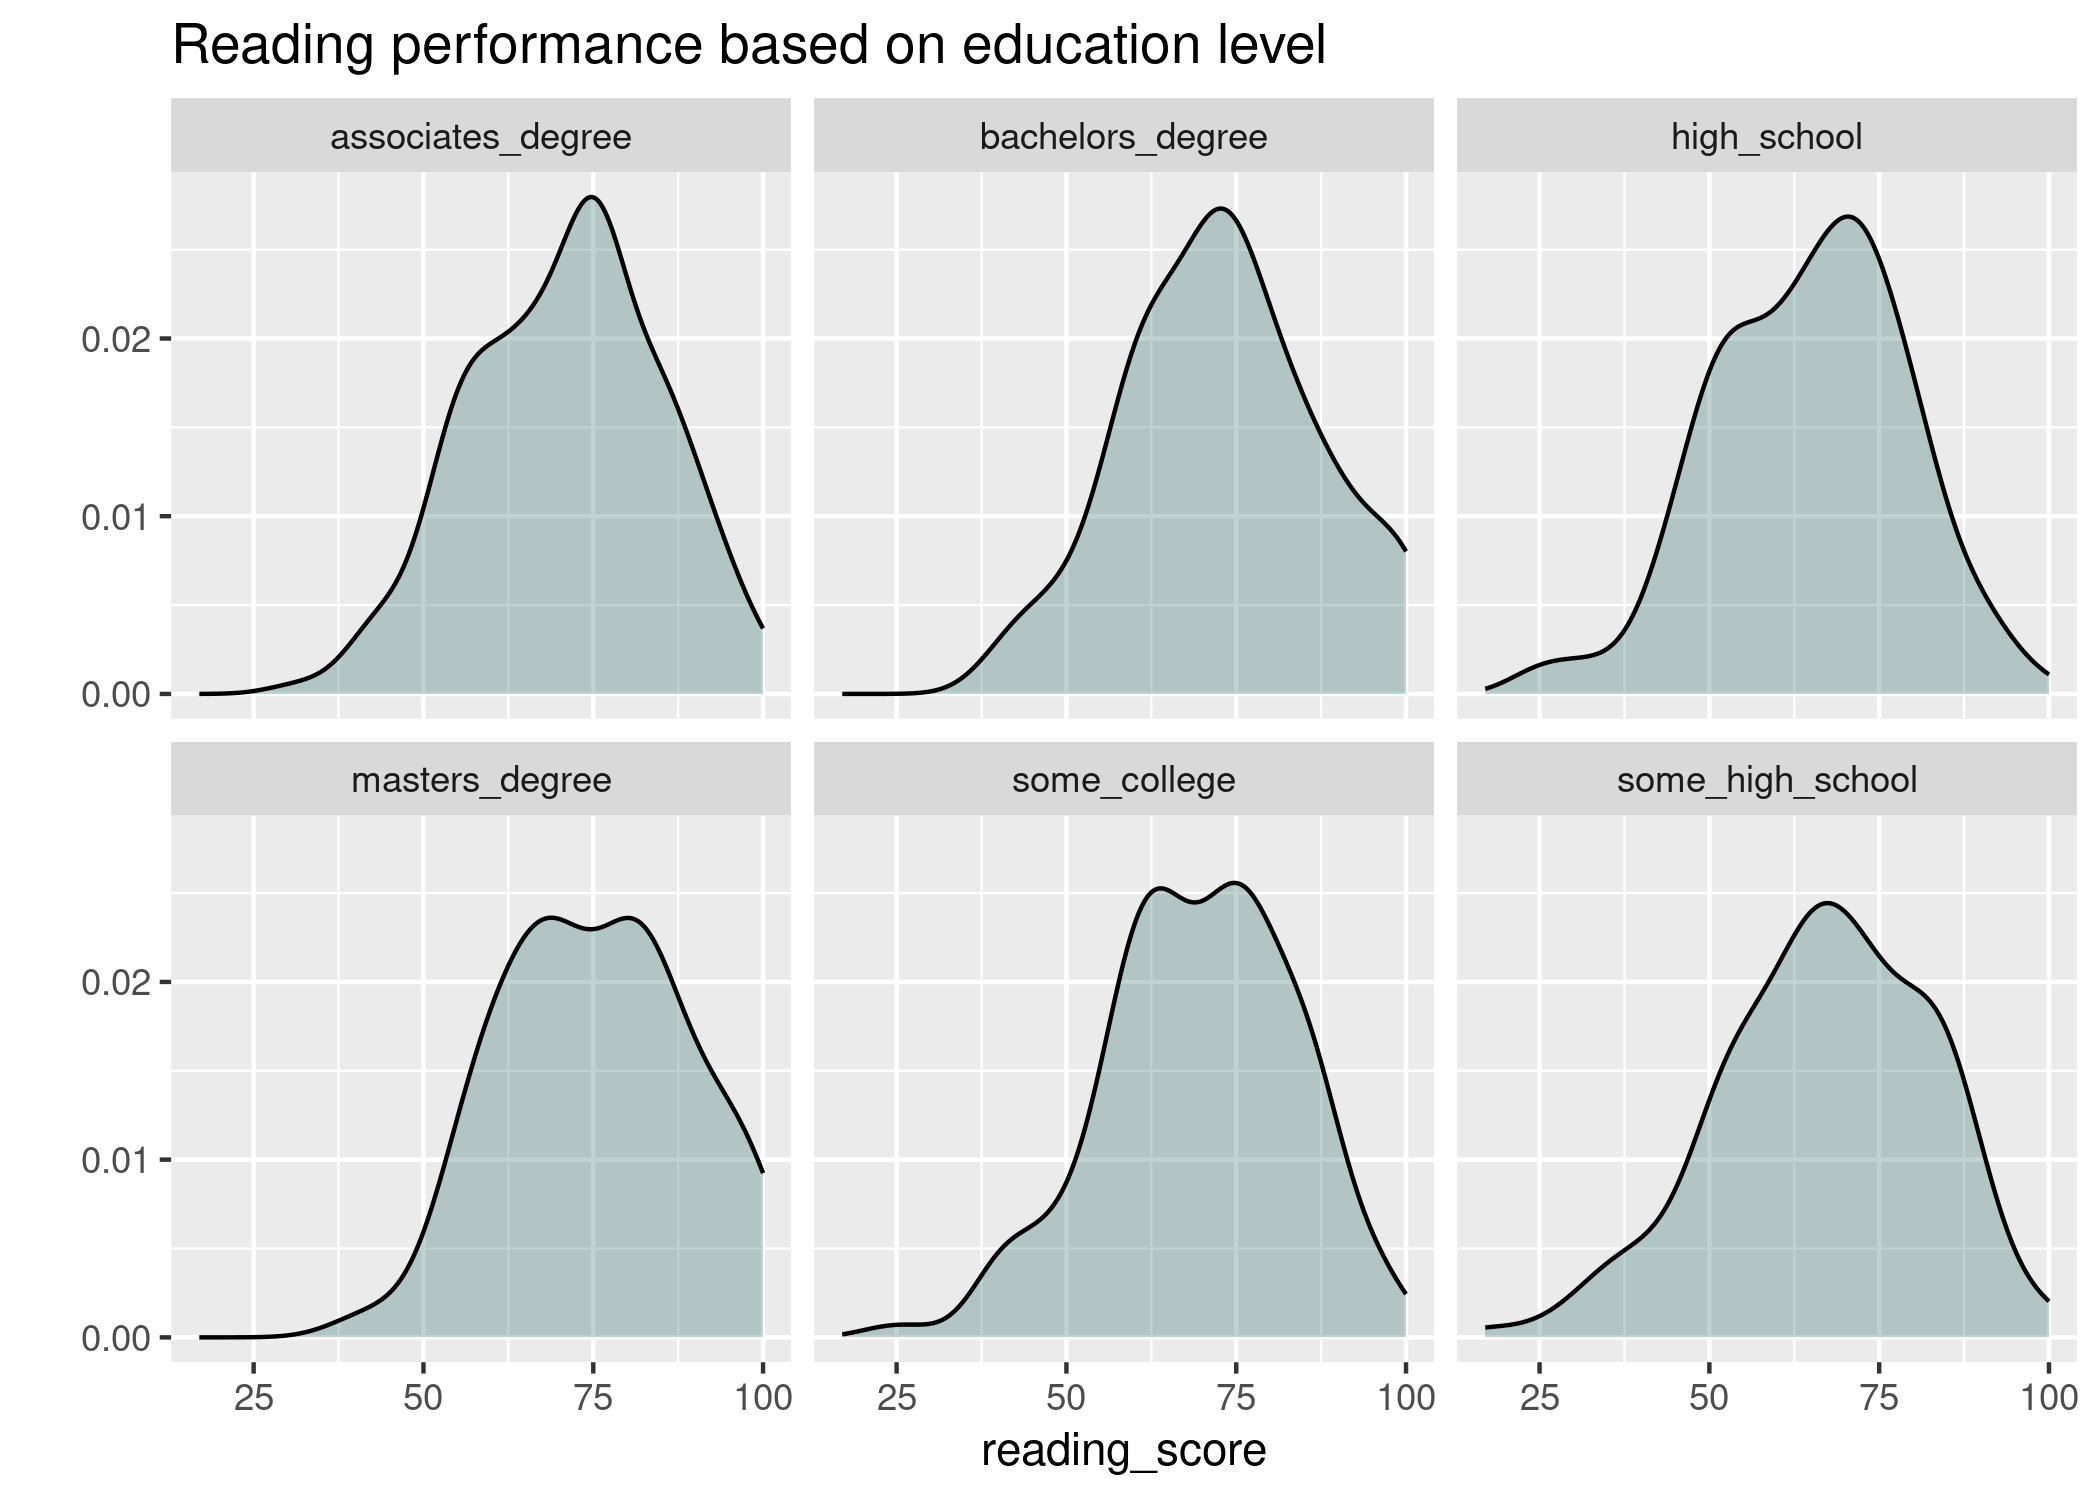

In [140]:
df %>% 
    ggplot() +
    geom_density(aes(x=reading_score), alpha=0.3, color="black", fill="#2e6969") + 
    labs(title = "Reading performance based on education level", y = "") + 
    facet_wrap(vars(education_level))

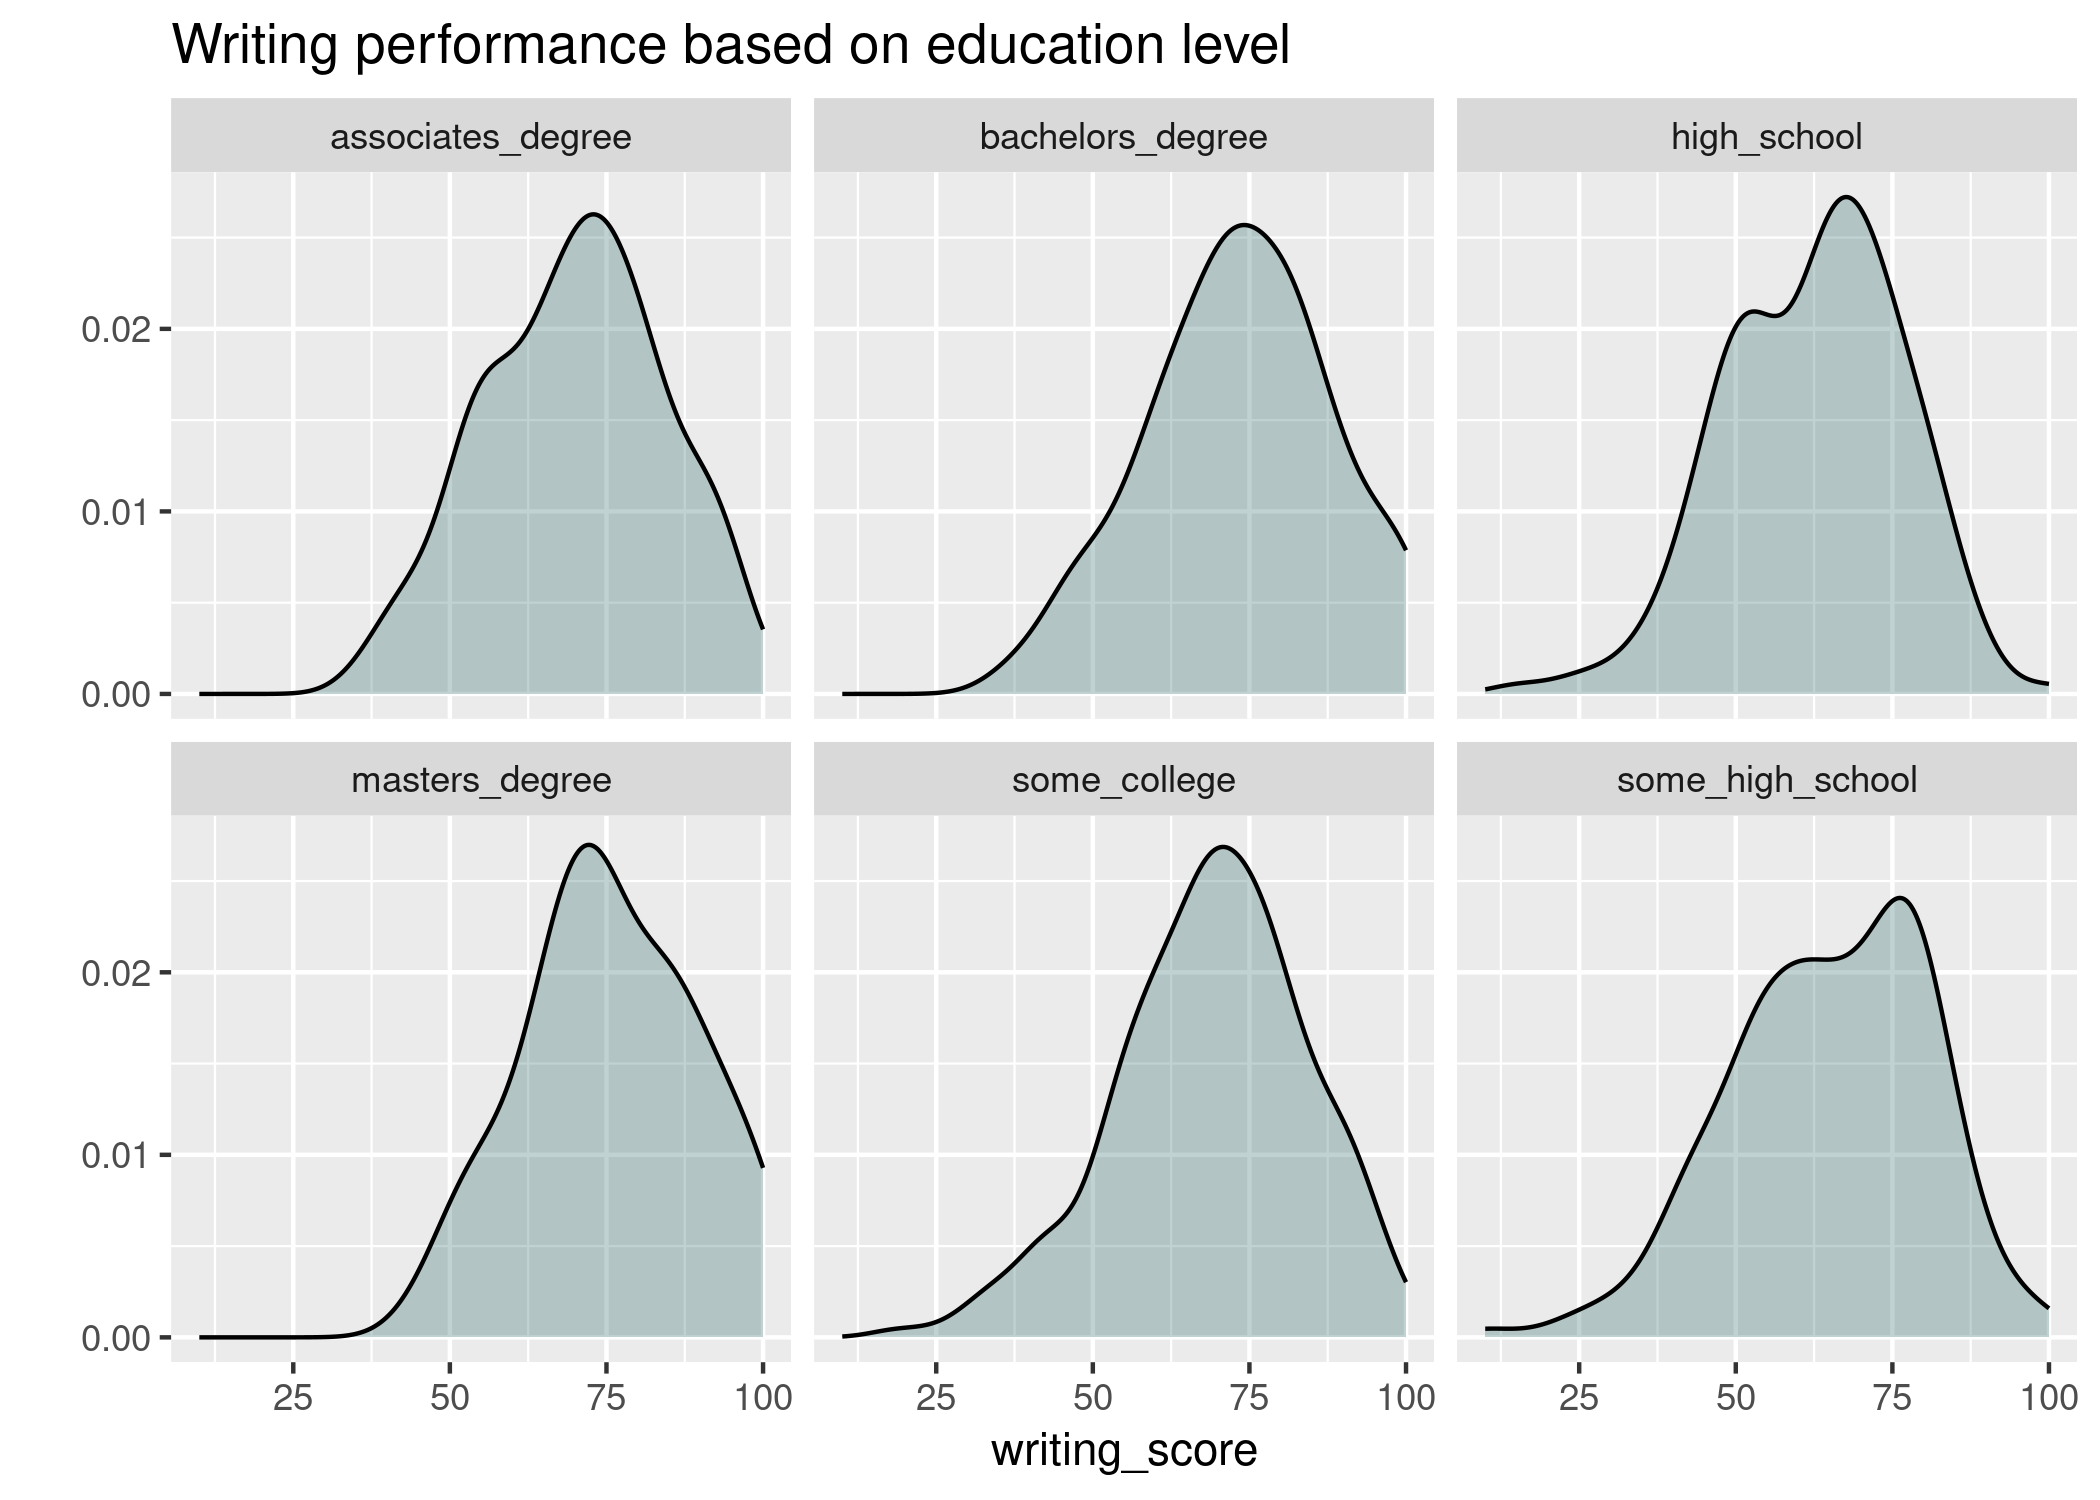

In [141]:
df %>% 
    ggplot() +
    geom_density(aes(x=writing_score), alpha=0.3, color="black", fill="#2e6969") + 
    labs(title = "Writing performance based on education level", y = "") + 
    facet_wrap(vars(education_level))

Normality tests:

In [142]:
shapiro.test(df$math_score)


	Shapiro-Wilk normality test

data:  df$math_score
W = 0.99315, p-value = 0.0001455


In [143]:
shapiro.test(df$reading_score)


	Shapiro-Wilk normality test

data:  df$reading_score
W = 0.99292, p-value = 0.0001055


In [144]:
shapiro.test(df$writing_score)


	Shapiro-Wilk normality test

data:  df$writing_score
W = 0.99196, p-value = 2.922e-05


So, none of the scores is normally distributed wtih 95% confidence level.

Correlation tests:

In [145]:
cor.test(df$math_score, df$writing_score, method="pearson")


	Pearson's product-moment correlation

data:  df$math_score and df$writing_score
t = 42.511, df = 998, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7794321 0.8236517
sample estimates:
     cor 
0.802642 


In [146]:
cor.test(df$math_score, df$reading_score, method="pearson")


	Pearson's product-moment correlation

data:  df$math_score and df$reading_score
t = 44.855, df = 998, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7959276 0.8371428
sample estimates:
      cor 
0.8175797 


In [147]:
cor.test(df$reading_score, df$writing_score, method="pearson")


	Pearson's product-moment correlation

data:  df$reading_score and df$writing_score
t = 101.23, df = 998, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9487506 0.9597921
sample estimates:
      cor 
0.9545981 


So, all of the scores are statistically significant positivly correlated.

Some comparisons:

In [148]:
wilcox.test(filter(df, gender == "female")$math_score, filter(df, gender == "male")$math_score)


	Wilcoxon rank sum test with continuity correction

data:  filter(df, gender == "female")$math_score and filter(df, gender == "male")$math_score
W = 101768, p-value = 4.279e-07
alternative hypothesis: true location shift is not equal to 0


In [149]:
wilcox.test(filter(df, gender == "female")$reading_score, filter(df, gender == "male")$reading_score)


	Wilcoxon rank sum test with continuity correction

data:  filter(df, gender == "female")$reading_score and filter(df, gender == "male")$reading_score
W = 160508, p-value = 5.374e-15
alternative hypothesis: true location shift is not equal to 0


In [150]:
wilcox.test(filter(df, gender == "female")$writing_score, filter(df, gender == "male")$writing_score)


	Wilcoxon rank sum test with continuity correction

data:  filter(df, gender == "female")$writing_score and filter(df, gender == "male")$writing_score
W = 169956, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


So, in average male and female scores do differ significantly.